---
title: "ORCASRelatedQuery Dataset"
author: "Suchith Prabhu"
date: "2023-04-17"
description: This blog post aims to provide information regarding the ORCAS dataset.
image: "images/thumbnail.png"
jupyter: python3
sidebar: false
draft: false

---

In [38]:
#| echo: false

import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from collections import defaultdict
import matplotlib.pyplot as plt
from PIL import Image

* Dataset can be downloaded from this [link]().
* Code for creating the dataset can be accessed [here](https://github.com/suchith720/ORCASRelatedQueries).

# ORCAS Dataset

The ORCAS dataset is a collection of tuples that relate queries to their corresponding relevant documents using a click-based approach. Further details about the dataset can be accessed [here](https://github.com/microsoft/msmarco/blob/master/ORCAS.md).



The format of the dataset is as follows:

* `QID : 10103699`
* `Q   : why is the sky blue`
* `DID : D1968574`
* `U   : http://www.sciencemadesimple.com/sky_blue.html`

In [3]:
#| echo: false

data_file = "../data/ORCASRelatedQueries-10M/rawData/orcas.tsv"
df = pd.read_csv(data_file, sep='\t', header=None)

Brief overview of the dataset.

In [4]:
#| echo: false

df_sample = df.sample(n=10).reset_index(drop=True)
df_sample.columns = ['QID', 'Query', 'DID', 'URL']
df_sample

,QID,Query,DID,URL
0,3100858,fund ratings and performance,D3293623,https://money.usnews.com/funds/mutual-funds
1,4727011,free teaching resources,D1296313,https://www.teacherspayteachers.com/Browse/Pri...
2,2822267,financial performance of a company,D159176,https://www.investopedia.com/terms/f/financial...
3,4606488,fitnessgram healthy fitness zone,D1115085,http://www.cde.ca.gov/ta/tg/pf/healthfitzones.asp
4,8842812,microsoft,D3102692,https://blogs.windows.com/
5,5943580,bulge in aorta,D67020,https://www.webmd.com/heart-disease/heart-dise...
6,8050401,water well problems,D570148,http://www.inspectapedia.com/water/Water_Pump_...
7,8123911,child benefit contact,D1883873,https://www.welfare.ie/en/Pages/273_Child-Bene...
8,10415703,stx putters,D2889864,http://www.stx.com/
9,10727767,iphone x prices,D3481922,http://money.cnn.com/2017/09/13/technology/bus...


# RelatedQuery Dataset

This dataset was generated by utilizing the ORCAS query-document bipartite graph by collecting all two-hop neighbors of each query. The queries were then ranked based on the number of different paths leading to each query. The construction of this dataset can be replicated using the code available at this [link](https://github.com/suchith720/ORCASRelatedQueries). Further information regarding the dataset generation process can be found [here](https://suchith720.github.io/posts/research/axel-experiments/).

In [10]:
#| echo: false
import xclib.data.data_utils as du

map_file = "../data/ORCASRelatedQueries-10M/tmp/query_map.csv"
query_map_df = pd.read_csv(map_file, header=None)
query_map = [(row[1][0], row[1][2]) for row in query_map_df.iterrows()]
map_data = dict(query_map)

q2q_data = du.read_sparse_file("../data/ORCASRelatedQueries-10M/data/query2query_graph.txt")

Please find below a brief overview of the dataset, the first line after the number is the actual query and on the next line following `--` are the list of related queries:

In [21]:
#| echo: false
#| panel: input

for i, qid in enumerate(np.random.randint(len(map_data), size=10)):
    print(f'{i+1}. {map_data[qid]}')
    print("-- ", end='')
    for rqid in q2q_data[qid].indices[:19]:
        print(map_data[rqid], ",", sep="", end=" ")
    print(map_data[20], end="\n\n")

1. victoria's secret customer service phone number
-- victoria's secret contact number, victoria secret phone number, victoria secret phone number customer service, victoria secret contact number, victoria's secret customer service phone number, debridemnt

2. sexual health issues
-- sexual health issues, sexual health topics, reproductive health issues, debridemnt

3. incubation period for norovirus
-- what is the norovirus, noro-virus, noro virus, treating norovirus, norovirus how long does it last, nurovirus, treatment of norovirus, what causes norovirus, d&v, stomach bug contagious period, novus virus, gastric flu nhs, sickness bug, virus sickness, how long does a stomach bug last, sickness and diarrhoea bug, nora viruses 2018, how is norovirus spread nhs, sickness virus, debridemnt

4. simpl pay
-- pay, simple pay, paysimple, www.simplepay.com, simply pay, paysim, online payment processing, simplepay, paysimple login, simple pay saves, online payment software, simplepaysaves.com, 

Presented below are some of the queries with the least number of co-queries.

In [34]:
#| echo: false
#| panel: input

neighbours = q2q_data.getnnz(axis=1)
sort_idx = np.argsort(neighbours)

def query_stat_1(idxs):
    for i, idx in enumerate(idxs):
        row = q2q_data[idx]
        print(f'{i+1}. {map_data[idx]}')
        for i, ridx in enumerate(row.indices[:20]):
            if i == 0:
                print(f'-- {map_data[ridx]}', end='')
            else:
                print(f', {map_data[ridx]}', end='')
        print(end='\n\n')
        
query_stat_1(sort_idx[:10])

1. dust mite size
-- dust mite size

2. pentwater michigan rentals
-- pentwater michigan rentals

3. cottage grove oregon population
-- cottage grove oregon population

4. what does burdensome mean
-- what does burdensome mean

5. callaway shafts replacements
-- callaway shafts replacements

6. what is a mac mini used for
-- what is a mac mini used for

7. solar rechargeable batteries
-- solar rechargeable batteries

8. pronographic timeline
-- pronographic timeline

9. autocad express tools download
-- autocad express tools download

10. 300 gb
-- 300 gb



Presented below are some of the queries with the highest number of co-queries.

In [35]:
#| echo: false
#| panel: input

query_stat_1(sort_idx[-10:])

1. youtube
-- by yahoo, live cnn news, mfacebookcom, apple 10 max, .io unblocked, face blook, apaple, Ð¾Ð¾Ð½, downlond, amexsavings, american express credit card customer service, ryan. toy, ericanexpress, apple \x5c, www.face book.com, mankreft, d.facebook, how to change youtube url name, toys and me on youtube, wells fargo home rebate card

2. y
-- by yahoo, www.bbt.comchecks, apple 10 max, .io unblocked, gmaildownload, apaple, bluebook price, y chromosome genes, la time, shutterfly site, www.gamil.com sign in, weebily, mg.mail.yahoo.com login, khan academy classroom, apple \x5c, bbb bank, mue torrent, ako enterprise email link, ubunyu, check my ako account

3. email
-- by yahoo, faily mail, mail com email, gmaildownload, outlook ogin, www.gamil.com sign in, mg.mail.yahoo.com login, aller sur mon compte icloud, osu one source, i cloud accesso, daily l, www.outlook.lcom, myatt.mail, att.net login home, oiutlo, https://mail.com/, googlemail log on uk, daily mail sign in uk, contact u, 

Presented below are some of the queries with an average number of co-queries.

In [36]:
#| echo: false
#| panel: input

query_stat_1(sort_idx[5202658-5:5202658+4])

1. city of redmond wa
-- act, redmond california, redmond washington microsoft, redmond or, redmond oregon, redmon, redmond wa 98052, erdmond, city of redmond or, redding washington, city of, redman wa, redmond ca, city of redmond permit center, microsoft washington state, ha, redmond microsoft, construction hours, redmond population, redmond pool

2. dumbo 1941
-- dumbo crows, dumbo walt disney, dumbo ending, dumbo film wiki, dumbo mother, dumbo original film, dumbo animated film, dumbo wiki, name of mouse in dumbo, dumbo 1941, story of dumbo, dumbo the elephant full movie, dumbo animated, does dumbo die, dumbo animated movie, udmbo, dumbo vhs, crows dumbo, dumbo storyline, does dumbo's mom die

3. ear wash flush
-- ear flush, ear irrigator, ear syringing procedure, ear rinse, ear flushing, ear syringe, ear washer, ear wash, how to clean ears out, ear wax irrigation, ear irrigation system, ear irrigation, ear wash flush, how to get water out of ear, how to unplug ears, ear wash kit, p

Three versions of the dataset have been created by the downsampling the orignal raw dataset by randomly removing tuples from the query-to-document dataset.

Following are the three versions of the dataset:

1. `ORCASRelatedQueries-10M ` : created using the raw dump.
2. `ORCASRelatedQueries-1M  ` : created by randomly sampling 0.1 tuples from the raw dump. 
3. `ORCASRelatedQueries-500K` : created by randomly sampling 0.05 tuples from the raw dump.

All the versions of the dataset are stored in the same directory format:

+ `data/   `
    * `query2query_graph.txt  :` full query-to-query dataset without the train-test split.

+ `images/ `
    * `X_Y_label_dist.png     :` label distribution of the __data/query2query_graph.txt__ file.<br>
    * `trn_X_Y_label_dist.png :` label distribution of the __xc/trn_X_Y.txt__ file.<br>
    * `tst_X_Y_label_dist.png :` label distribution of the __xc/tst_X_Y.txt__ file.

+ `rawData/`
    * `orcas.tsv              :` raw dump of query-to-document relations.

+ `tmp/    `
    * `query2doc_graph.txt    :` query-to-document relations stored in adjacency list format extracted from "rawData/orcas.tsv" 
    * `query_map.csv          :` 

+ `xc/.    `
    * `trn_X_Y.txt            :` training data in XC format.<br>
    * `tst_X_Y.txt            :` testing data in XC format. <br>
    * `train_map.txt          :` mapping from query ID to query text for training data points.<br>
    * `test_map.txt           :` mapping from query ID to query text for testing data points.<br>
    * `label_map.txt          :` mapping from query ID to query text for label data points.
    * `filter_labels_train.txt:` filter file for testing data.<br>
    * `filter_labels_test.txt :` filter file for training data.

## ORCASRelatedQueries-10M

In [47]:
#| echo: false
#| output: false

with open("../programs/orcas/data/ORCASRelatedQueries-10M.txt", "r") as f:
    print(f.read())

** X_Y : 
   No. of datapoints  No. of labels  ...  Max. neighbours  Min. neighbours
0           10405317       10405317  ...            88030                1

[1 rows x 6 columns]
              5         10        50        100       1000
fraction  0.069662  0.134415  0.427165  0.584897  0.927086
** trn_X_Y : 
   No. of datapoints  No. of labels  ...  Max. neighbours  Min. neighbours
0            7082756       10019510  ...            88025                1

[1 rows x 6 columns]
             5         10        50        100       1000
fraction  0.05047  0.111658  0.411021  0.573027  0.924949
** tst_X_Y : 
   No. of datapoints  No. of labels  ...  Max. neighbours  Min. neighbours
0            3072092       10019510  ...            73566                1

[1 rows x 6 columns]
              5         10        50        100       1000
fraction  0.054886  0.120603  0.418129  0.578623  0.926072
Lowest co-queries : 
* dust mite size
- dust mite size
, dust mite size
* pentwater michigan r

The following statistics provide an overview of the ORCASRelatedQueries-10M:

| filename  | No. of datapoints  | No. of labels | Avg. labels per datapoint |  Avg. datapoints per label | Max. neighbours | Min. neighbours |
|---|---|---|---|---|---|---|
| query2query_graph.txt      | 10405317  |  10405317 |  327.641714 | 327.641714 | 88030 | 1 |
| trn_X_Y.txt  |  7082756 |  10019510 |  337.151357 |  238.331096 | 88025 | 1 |
| tst_X_Y.txt  | 3072092 | 10019510  |  332.048731  |  101.809794 | 73566 | 1 |

The table below presents information on the percentage of queries with co-queries less than or equal to a given threshold.

| filename  | 5 queries | 10 queries | 50 queries | 100 queries | 1000 queries |
|---|---|---|---|---|---|
| query2query_graph.txt | 0.069662 | 0.134415 | 0.427165 | 0.584897 | 0.927086 |
| trn_X_Y.txt  |   0.05047 | 0.111658 | 0.411021 | 0.573027 | 0.924949 |
| tst_X_Y.txt  |   0.054886 | 0.120603 | 0.418129 | 0.578623 | 0.926072 |

The distribution of co-queries is displayed below.

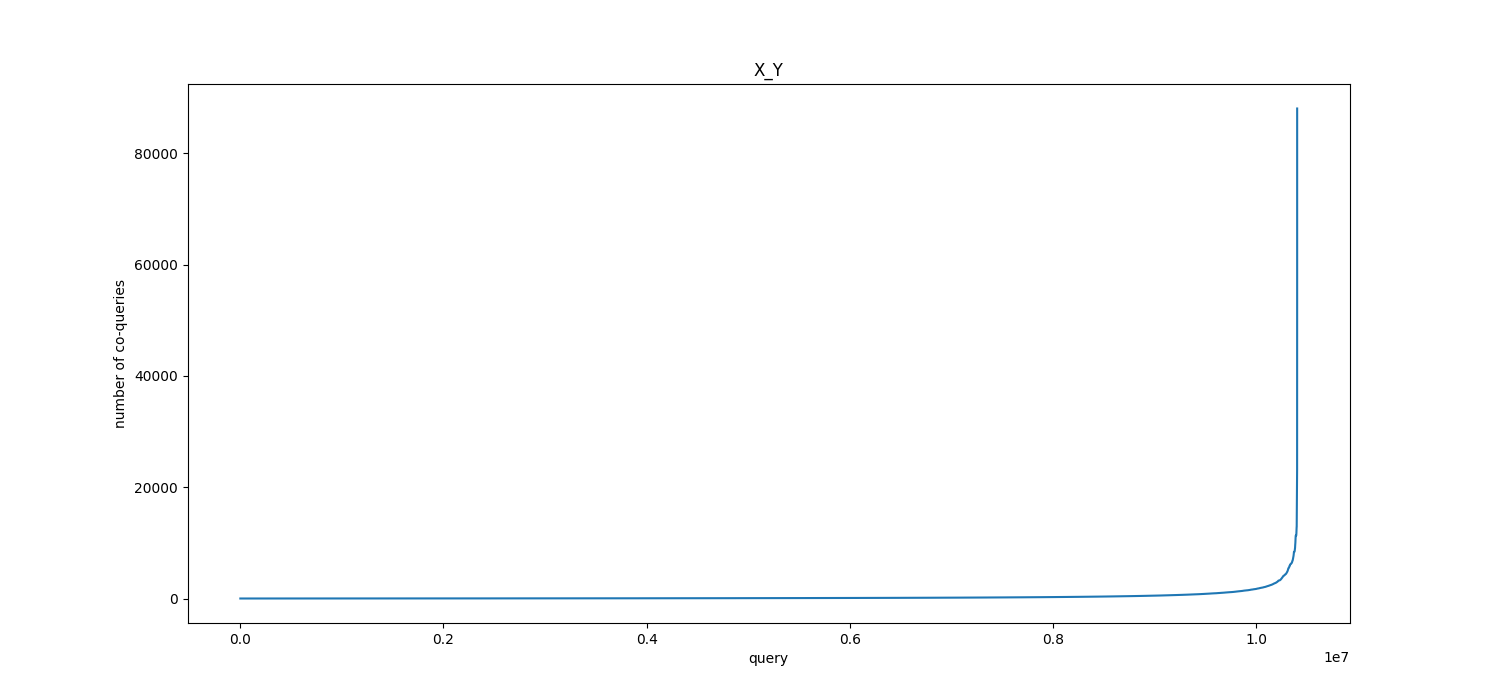

In [41]:
#| echo: false
#| fig-cap : ORCASRelatedQueries-10M label distribution among data-points.

Image.open("../data/ORCASRelatedQueries-10M/images/X_Y_label_dist.png")

## ORCASRelatedQueries-1M

In [50]:
#| echo: false
#| output: false

with open("../programs/orcas/data/ORCASRelatedQueries-1M.txt", "r") as f:
    print(f.read())

** X_Y : 
   No. of datapoints  No. of labels  ...  Max. neighbours  Min. neighbours
0            1700719        1700719  ...             2191                1

[1 rows x 6 columns]
              5         10        50        100      1000
fraction  0.480854  0.645405  0.896309  0.948241  0.99924
** trn_X_Y : 
   No. of datapoints  No. of labels  ...  Max. neighbours  Min. neighbours
0             833585        1201266  ...             2191                1

[1 rows x 6 columns]
              5         10       50        100       1000
fraction  0.287786  0.497854  0.85183  0.925955  0.998898
** tst_X_Y : 
   No. of datapoints  No. of labels  ...  Max. neighbours  Min. neighbours
0             410917        1201266  ...             2155                1

[1 rows x 6 columns]
              5         10        50       100       1000
fraction  0.357581  0.560997  0.871687  0.93606  0.999092
Lowest co-queries : 
* bonner
- bonner
, bonner
* dr seuss font generator
- dr seuss font generato

The following statistics provide an overview of the ORCASRelatedQueries-1M:

| filename  | No. of datapoints  | No. of labels | Avg. labels per datapoint |  Avg. datapoints per label | Max. neighbours | Min. neighbours |
|---|---|---|---|---|---|---|
| query2query_graph.txt      | 1700719  |  1700719 |  24.193609 | 24.193609 | 2191 | 1 |
| trn_X_Y.txt  |  833585 |  1201266 |  33.595666 |  23.312774 | 2191 | 1 |
| tst_X_Y.txt  |  410917 | 1201266  |  29.516002  |  10.096537 | 2155 | 1 |

The table below presents information on the percentage of queries with co-queries less than or equal to a given threshold.

| filename  | 5 queries | 10 queries | 50 queries | 100 queries | 1000 queries |
|---|---|---|---|---|---|
| query2query_graph.txt | 0.480854 | 0.645405 | 0.896309 | 0.948241 | 0.99924 |
| trn_X_Y  |   0.379675 | 0.287786 | 0.497854 | 0.85183 | 0.925955 | 0.998898 |
| tst_X_Y  |   0.480797 | 0.357581 | 0.560997 | 0.871687 | 0.93606 | 0.999092 |

The distribution of co-queries is displayed below.

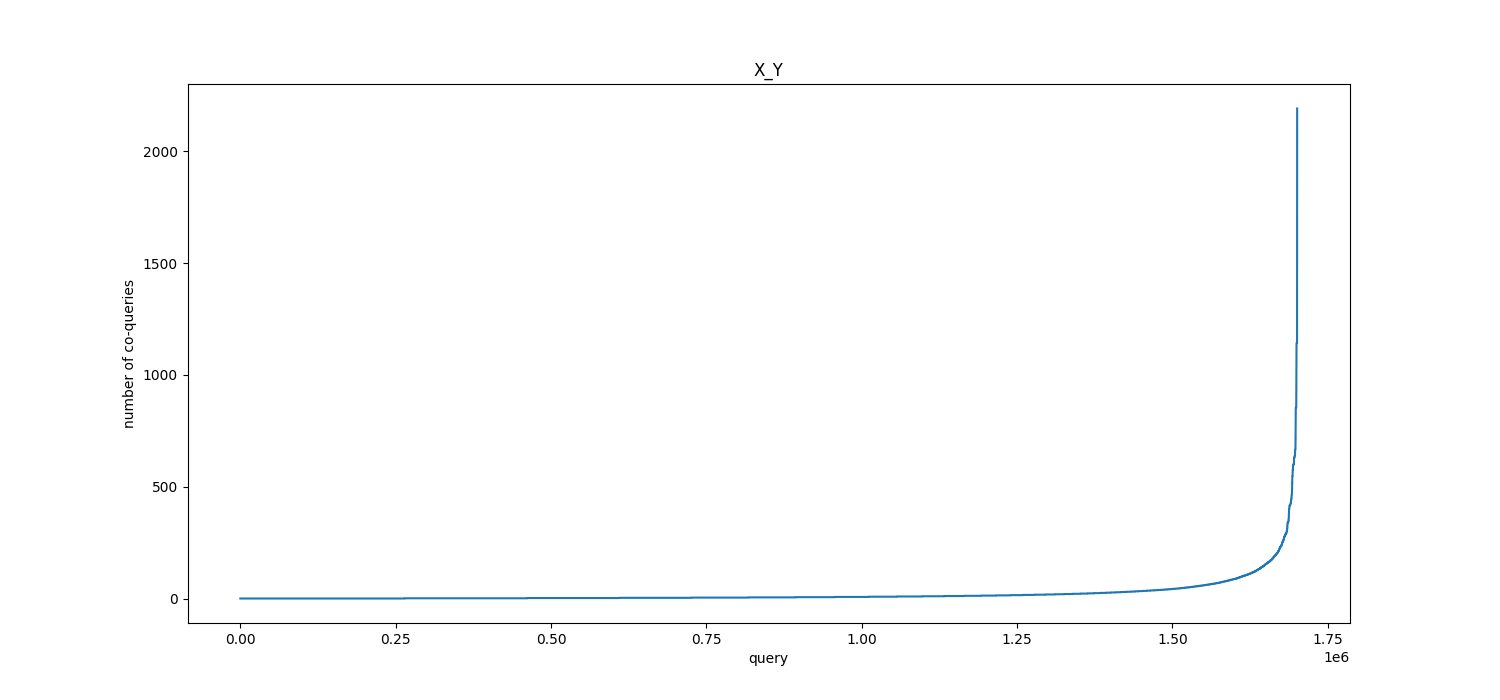

In [45]:
#| echo: false
#| fig-cap : ORCASRelatedQueries-1M label distribution among data-points.

Image.open("../data/ORCASRelatedQueries-1M/images/X_Y_label_dist.png")

## ORCASRelatedQueries-500K

In [49]:
#| echo: false
#| output: false

with open("../programs/orcas/data/ORCASRelatedQueries-500K.txt", "r") as f:
    print(f.read())

** X_Y : 
   No. of datapoints  No. of labels  ...  Max. neighbours  Min. neighbours
0             890683         890683  ...              887                1

[1 rows x 6 columns]
              5         10        50        100   1000
fraction  0.640011  0.779279  0.950524  0.981373   1.0
** trn_X_Y : 
   No. of datapoints  No. of labels  ...  Max. neighbours  Min. neighbours
0             344524         514971  ...              887                1

[1 rows x 6 columns]
              5         10        50        100   1000
fraction  0.379675  0.603778  0.910738  0.966417   1.0
** tst_X_Y : 
   No. of datapoints  No. of labels  ...  Max. neighbours  Min. neighbours
0             184473         514971  ...              835                1

[1 rows x 6 columns]
              5         10        50       100   1000
fraction  0.480797  0.681644  0.927946  0.97282   1.0
Lowest co-queries : 
* oligosaccharides vs polysaccharides
- oligosaccharides vs polysaccharides
, oligosaccharides vs

The following statistics provide an overview of the ORCASRelatedQueries-500K:

| filename  | No. of datapoints  | No. of labels | Avg. labels per datapoint |  Avg. datapoints per label | Max. neighbours | Min. neighbours |
|---|---|---|---|---|---|---|
| query2query_graph.txt      | 890683  |  890683 |  12.12764 | 12.12764 | 887 | 1 |
| trn_X_Y.txt  |  344524 |  514971 |  20.309325 |  13.58727 | 887 | 1 |
| tst_X_Y.txt  |  184473 | 184473  |  17.004689  |  6.091423 | 835 | 1 |

The table below presents information on the percentage of queries with co-queries less than or equal to a given threshold.

| filename  | 5 queries | 10 queries | 50 queries | 100 queries | 1000 queries |
|---|---|---|---|---|---|
| query2query_graph.txt | 0.640011 | 0.779279 | 0.950524 | 0.981373 | 1.0 |
| trn_X_Y  |   0.379675 | 0.603778 | 0.910738 | 0.966417 |  1.0 |
| tst_X_Y  |   0.480797 | 0.681644 | 0.927946 | 0.97282 |  1.0 |

The distribution of co-queries is displayed below.

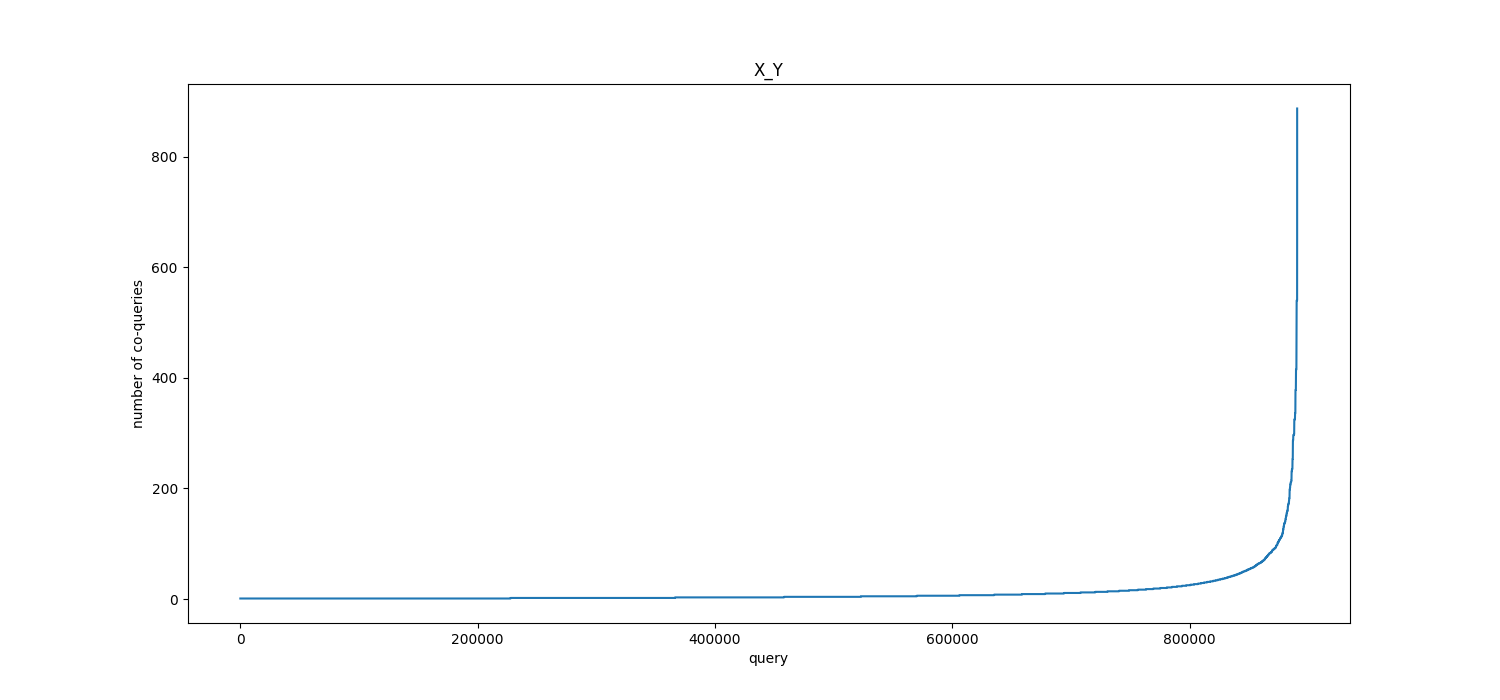

In [44]:
#| echo: false
#| fig-cap : ORCASRelatedQueries-500K label distribution among data-points.

Image.open("../data/ORCASRelatedQueries-500K/images/X_Y_label_dist.png")